## Spacy

In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_sm')

In [12]:
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million' )

In [14]:
for token in doc:
    print(token.text, token.pos_, token.dep_)

Tesla NOUN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj


In [15]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x143ef13cf40>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x143ef13ce80>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x143eee9add0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x143ef1749c0>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x143ef157240>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x143eee9ac80>)]

In [16]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [17]:
doc2 = nlp(u"Tesla isn't looking into startups anymore.")

In [18]:
for token in doc2:
    print(token.text, token.pos_, token.dep_)

Tesla NOUN nsubj
is AUX aux
n't PART neg
looking VERB ROOT
into ADP prep
startups NOUN pobj
anymore ADV advmod
. PUNCT punct


In [19]:
doc2[0].pos_

'NOUN'

In [20]:
doc2[0].dep_

'nsubj'

In [21]:
print(doc2[0].text)
print(doc2[0].lemma_)
print(doc2[0].tag_)
print(doc2[0].shape_)
print(doc2[0].is_alpha)
print(doc2[0].is_stop)

Tesla
tesla
NN
Xxxxx
True
False


In [24]:
doc4 = nlp(u"This is the first sentence. This is the second sentence. This is the third sentence. This is the fourth sentence.")

In [25]:
for sentence in doc4.sents:
    print(sentence)

This is the first sentence.
This is the second sentence.
This is the third sentence.
This is the fourth sentence.


In [26]:
doc4[6].is_sent_start

True

In [27]:
doc4[8].is_sent_start

False

## Tokenization

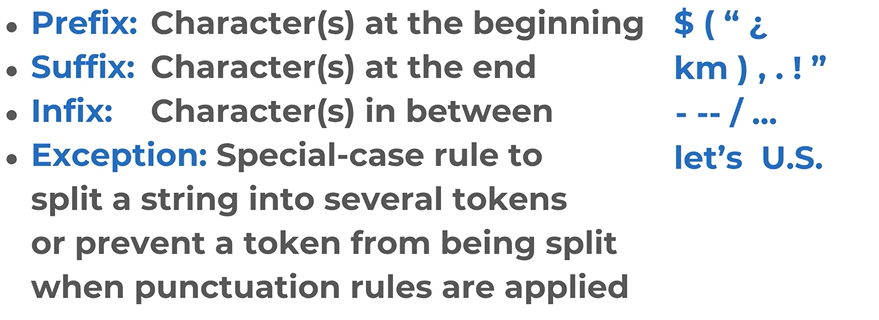

In [3]:
mystring = '"We\'re moving to L.A.!"'

In [4]:
print(mystring)

"We're moving to L.A.!"


In [6]:
doc = nlp(mystring)

In [8]:
for token in doc:
    print(token.text)

"
We
're
moving
to
L.A.
!
"


In [10]:
doc2 = nlp(u"We're here to help! support @oursite.com or http://www.oursite.com")

In [11]:
for t in doc2:
    print(t)

We
're
here
to
help
!
support
@oursite.com
or
http://www.oursite.com


In [12]:
doc3 = nlp(u"A 5km NYC cab ride costs $10.30")

In [13]:
for t in doc3:
    print(t)

A
5
km
NYC
cab
ride
costs
$
10.30


In [15]:
doc4 = nlp(u"Let's visit St. Louis in the U.S. next year.")

In [16]:
for t in doc4:
    print(t)

Let
's
visit
St.
Louis
in
the
U.S.
next
year
.


In [17]:
len(doc4)

11

In [19]:
len(doc4.vocab)

796

In [20]:
doc5 = nlp(u"It is better to give than receive.")

In [21]:
doc5[0]

It

In [22]:
doc5[2:5]

better to give

In [23]:
doc8 = nlp(u'Apple to build a Hong Kong factory for $6 million')

In [25]:
for token in doc8:
    print(token.text,end= " | ")

Apple | to | build | a | Hong | Kong | factory | for | $ | 6 | million | 

In [29]:
for entity in doc8.ents:
    print(entity)
    print(entity.label_)
    print(str(spacy.explain(entity.label_)))
    print("\n")

Hong Kong
GPE
Countries, cities, states


$6 million
MONEY
Monetary values, including unit




In [30]:
doc9= nlp(u'Autonomous cars shift insurance liability toward manufacturers.')

In [31]:
for chunk in doc9.noun_chunks:
    print(chunk)

Autonomous cars
insurance liability
manufacturers


### Visualization

In [32]:
from spacy import displacy

In [33]:
doc = nlp(u'Apple is going to build a U.K. factory for $6 million.')

In [35]:
displacy.render(doc,style='dep',jupyter=True, options={'distance' : 110})

In [36]:
doc = nlp(u'Over the last quarter Apple sold nearly 20 thousand ipods for a profit of $6 million.')

In [37]:
displacy.render(doc,style='ent',jupyter=True)

In [ ]:
doc = nlp(u'This is a sentence.')
displacy.serve(doc,style='dep')
# runs on a server on localhost when you are not on jupyter...

### Stemming

In [ ]:
# spacy doesn't include stemming so we're using NLTK

In [38]:
import nltk

In [39]:
from nltk.stem.porter import PorterStemmer

In [40]:
p_stemmer = PorterStemmer()

In [42]:
words=['run','runner','ran','runs','easily','fairly']

In [45]:
for word in words:
    print(word + '  ------->  ' + p_stemmer.stem(word))

run  ------->  run
runner  ------->  runner
ran  ------->  ran
runs  ------->  run
easily  ------->  easili
fairly  ------->  fairli


In [47]:
from nltk.stem.snowball import SnowballStemmer

In [48]:
s_stemmer = SnowballStemmer(language = 'english')

In [49]:
for word in words:
    print(word + '  ------->  ' + s_stemmer.stem(word))

run  ------->  run
runner  ------->  runner
ran  ------->  ran
runs  ------->  run
easily  ------->  easili
fairly  ------->  fair


### Lemmatization

In [50]:
doc1 = nlp(u'I am a runner running in a race because I love to run since I ran today.')

In [53]:
for token in doc1:
    print(token.text, '\t', token.pos_, '\t',token.lemma,'\t',token.lemma_)

I 	 PRON 	 4690420944186131903 	 I
am 	 AUX 	 10382539506755952630 	 be
a 	 DET 	 11901859001352538922 	 a
runner 	 NOUN 	 12640964157389618806 	 runner
running 	 VERB 	 12767647472892411841 	 run
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
race 	 NOUN 	 8048469955494714898 	 race
because 	 SCONJ 	 16950148841647037698 	 because
I 	 PRON 	 4690420944186131903 	 I
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 SCONJ 	 10066841407251338481 	 since
I 	 PRON 	 4690420944186131903 	 I
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today
. 	 PUNCT 	 12646065887601541794 	 .


### Stopwords

In [55]:
print(len(nlp.Defaults.stop_words))
print(nlp.Defaults.stop_words)
# it's a set

326
{'those', 'nine', 'then', 'eleven', 'here', 'often', 'over', 'yourselves', 'who', 'whom', 'thereafter', 'full', 'few', 'were', 'thus', 'ourselves', 'than', 'make', 'yet', '‘ll', 'as', 'anything', 'keep', 'there', 'being', 'throughout', 'whence', 'either', 'not', 'beyond', 'him', 'rather', 'already', 'sometime', 'do', 'to', 'hereafter', 'never', 'four', 'meanwhile', 'nowhere', 'mostly', 'perhaps', 'up', 'six', 'latterly', 'himself', 'am', 'you', 'some', 'but', 'using', 'beside', 'against', 'about', 'has', 'last', 'well', 'seem', 'towards', 'three', 'show', 'of', 'its', 'it', 'same', 'somehow', 'although', 'might', 'where', 'something', 'would', 'how', 'doing', 'below', 'call', 'somewhere', 'too', 'what', 'when', '’ll', 'whether', '’re', 'back', 'becomes', 'myself', 'every', 'should', 'under', 'thru', 'any', 'me', 'whatever', 'they', 'an', 'off', 'everyone', 'my', 'further', 'these', 'which', '‘ve', 'hundred', 'from', 'very', 'done', 'move', 'please', 'first', 'along', "'d", 'get', '

In [57]:
nlp.vocab['mystery'].is_stop

False

In [56]:
nlp.vocab['us'].is_stop

True

In [61]:
nlp.Defaults.stop_words.add('btw')

In [62]:
nlp.vocab['btw'].is_stop = True

In [63]:
nlp.vocab['btw'].is_stop

True

In [65]:
nlp.Defaults.stop_words.remove('beyond')

In [66]:
nlp.vocab['beyond'].is_stop

False

### Phrase matching & Vocabulary